Learning for this chapter: 
1. How to search for the data needed on Fred and filter out the data not relevant. # Also use query to speed up the filtering process. 
2. How to get different data series from Fred and combine these series into a dataframe.
3. How to extract strings using replace.
4. How to create a dictionary and pass on the values to the columns of a dataframe.
       id_to_state = unemp_df['title'].str.replace("Unemployment Rate in", "").to_dict()
       unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
5. Use plotly.express to draw interactive chart.
6. How to draw multiple charts using matplotlib, and how to create dual axes using twinx(). 

In [5]:
#!pip install fredapi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "258743ce08c237c03fc140e3b15e1b41"


#1. Create the Fred Object


In [9]:
fred = Fred(api_key = fred_key)

#2. search for Economic data


In [11]:
fred.search("S&P").columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [13]:
sp_fred = fred.search("S&P", order_by = "popularity")

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-05,2024-06-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-05 07:39:27-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-05,2024-06-05,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-05,2024-06-05,S&P 500,2014-06-05,2024-06-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-04 19:10:59-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-05,2024-06-05,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-05,2024-06-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-05 07:39:30-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-06-05,2024-06-05,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-06-05,2024-06-05,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:51-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-06-05,2024-06-05,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


#3. Pull Raw Data and Plot

In [16]:
sp500 = fred.get_series(series_id = "SP500")

<Axes: title={'center': 'S&P 500'}>

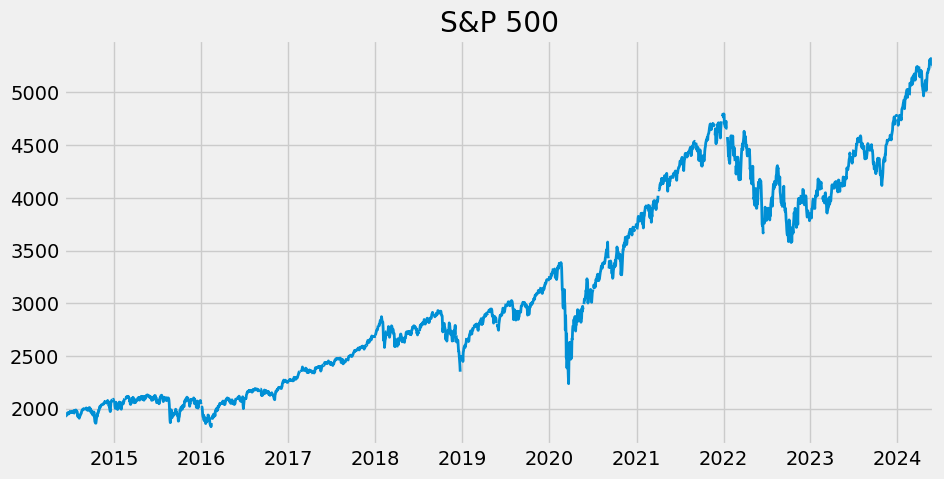

In [19]:
sp500.plot(figsize = (10, 5), title = "S&P 500", lw = 2)

# 4. Pull and Join Multiple Data Series


In [20]:
uemp_results = fred.search("unemployment")

In [21]:
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-05,2024-06-05,Unemployment Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:01-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-05,2024-06-05,Unemployment Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-03 07:45:27-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-06-05,2024-06-05,Unemployment Level,1948-01-01,2024-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-05-03 07:45:20-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-06-05,2024-06-05,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-06-05,2024-06-05,Continued Claims (Insured Unemployment),1967-01-07,2024-05-18,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-05-30 07:33:05-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-06-05,2024-06-05,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-06-05,2024-06-05,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-06-05,2024-06-05,Unemployment Rate - Married Women,1955-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:46:28-05:00,9,To obtain estimates of women worker employment...


In [22]:
unrate = fred.get_series("UNRATE")

<Axes: >

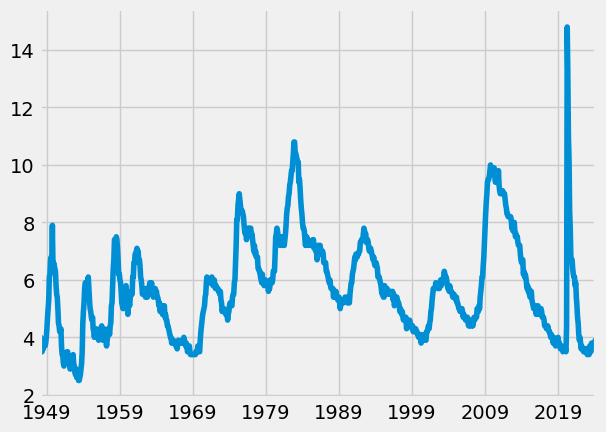

In [23]:
unrate.plot()

In [37]:
unemp_df = fred.search("unemployment state", filter = ("frequency","Monthly"))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"' )  # note you can use query to speed up the mask
unemp_df = unemp_df.loc[unemp_df['title'].str.contains("Unemployment Rate")]

In [41]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'TXUR',
       'LNS14000024', 'M0892BUSM156SNBR', 'LNS14000031', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'MIUR', 'LNS14027660', 'ALUR', 'LNS14027662', 'MAUR',
       'LNS14024887', 'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR',
       'VAUR', 'KYUR', 'MNUR', 'SCUR', 'NMUR', 'LRUN64TTUSM156S', 'TNUR',
       'LNS14032183', 'WAUR', 'MDUR', 'ORUR', 'LNS14000012', 'LNS14027659',
       'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR',
       'INUR', 'LAUR', 'HIUR', 'NDUR', 'LASMT261982000000003', 'MTUR', 'DCUR',
       'MSUR', 'LNS14000060', 'MEUR', 'NEUR', 'LNS14000028', 'CTUR', 'IDUR',
       'LASMT391746000000003', 'NHUR', 'RIUR', 'KSUR', 'LNS14000018', 'WYUR',
       'DEUR', 'VTUR', 'LNS14000036', 'SDUR', 'LNS14000032', 'CMWRUR',
       'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14100000',
       'LNS14000315', 

In [79]:
all_results = []

for myid in unemp_df.index: 
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

unemp_results = pd.concat(all_results, axis = 1).drop(['LNS14000006', 'M0892AUSM156SNBR', 'U2RATE',
       'LNS14000024', 'M0892BUSM156SNBR', 'LNS14000031',
       'LNS14000002', 'LNS14000009', 'LNS14000003',
       'LNS14000001',  'LNS14027660', 'LNS14027662', 'LNS14000032',
       'LNS14024887',
       'LRUN64TTUSM156S', 
       'LNS14032183','LNS14000012', 'LNS14027659',
       'LASMT261982000000003', 
       'LNS14000060','LNS14000028',
       'LASMT391746000000003', 'LNS14000018', 
       'LNS14000036', 
       'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14100000',
       'LNS14000315', 'LNS14000029', 'LNS14024230', 
       'LRUNTTTTUSM156S', 'LNS14000025', 'LNS14000061', 
       'LNS14000048',  'LNS14000026',  'LNS14000089',
       'M08311USM156SNBR', 'LNS14000150', 'M08320USM156SNBR'], axis = 1)

ValueError: Too Many Requests.  Exceeded Rate Limit

In [107]:
unemp_states = unemp_results.drop(["UNRATE","LNS14000032"], axis = 1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace("Unemployment Rate in", "").to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

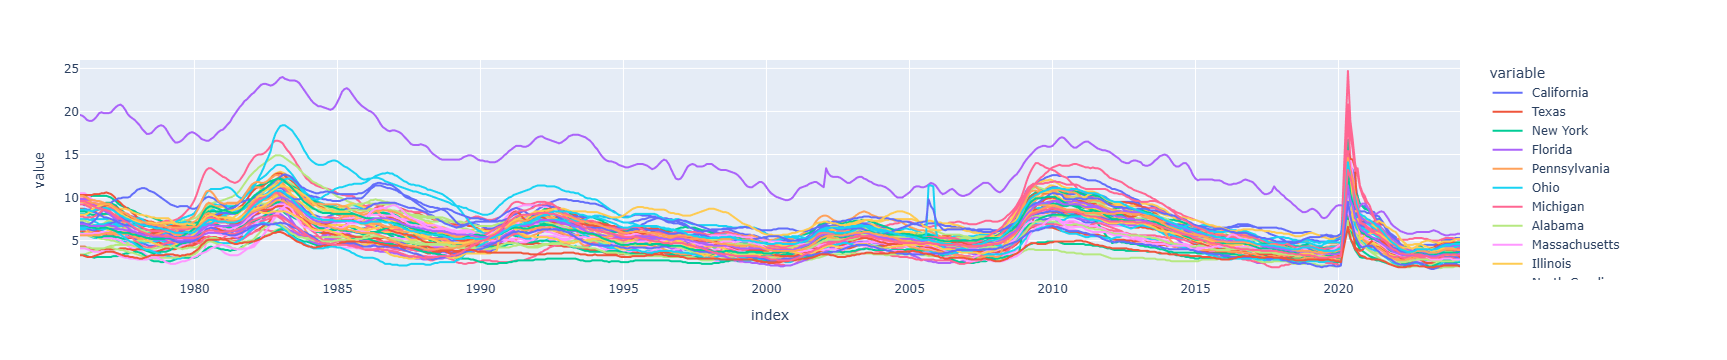

In [108]:
px.line(unemp_states)

# Pull April 2021 Unemployment Rate Per State

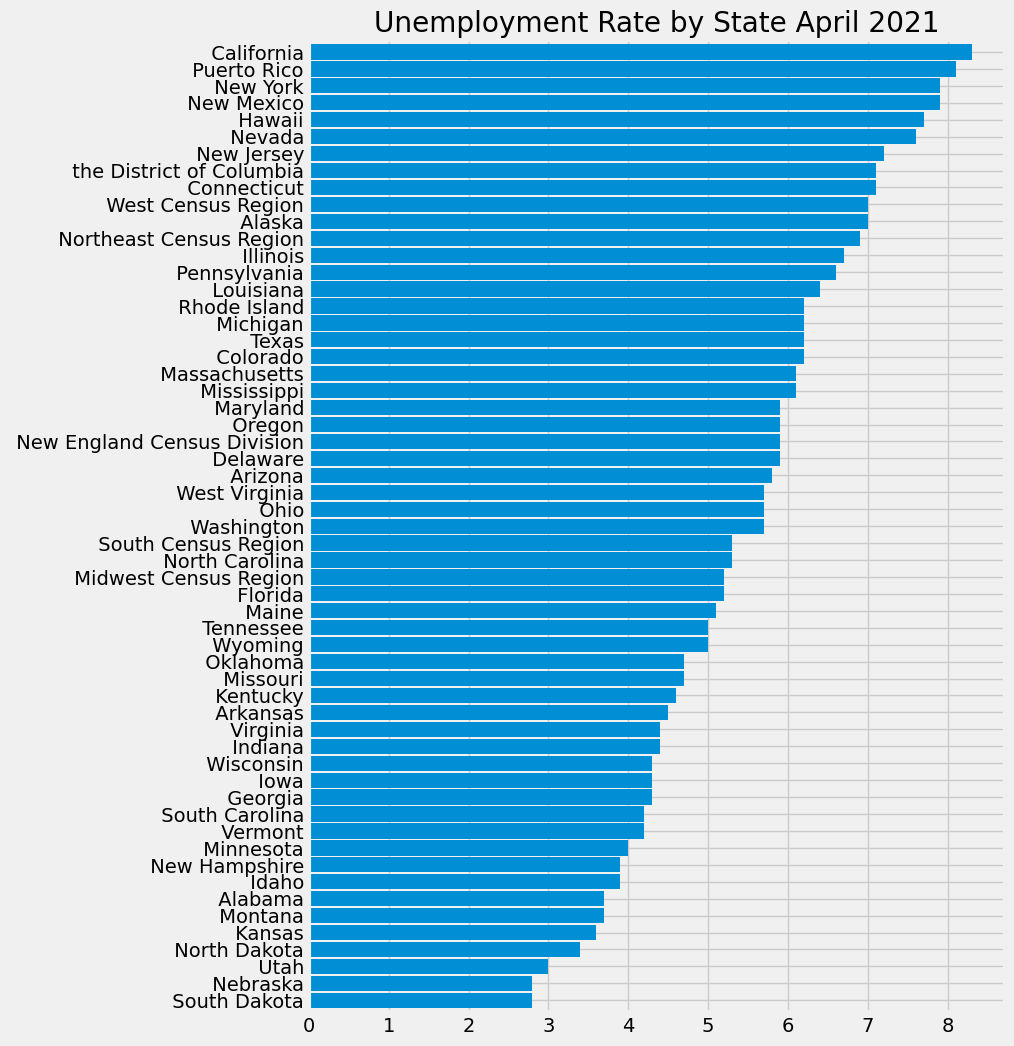

In [111]:
ax = unemp_states.loc[unemp_states.index == "2021-04-01"].T \
        .sort_values("2021-04-01") \
        .plot(kind = "barh", figsize = (8, 12), width = 0.9, title = "Unemployment Rate by State April 2021")
ax.legend().remove()
plt.show()

In [105]:
id_to_state = unemp_df['title'].str.replace("Unemployment Rate in", "").to_dict()
id_to_state

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': ' California',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'TXUR': ' Texas',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'NYUR': ' New York',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'FLUR': ' Florida',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'PAUR': ' Pennsylvania',
 'OHUR': ' Ohio',
 'LNS14000001': 'Unemployment Rate - Men',
 'MIUR': ' Michigan',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'ALUR': ' Alabama',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'MAUR': ' Massachusetts',
 'LNS14024887': 'Unemployment

In [99]:
unemp_states.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'MNUR', 'SCUR', 'NMUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR',
       'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object')

In [106]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,North Carolina,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,Minnesota,South Carolina,New Mexico,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota,Midwest Census Region,South Census Region,Northeast Census Region,West Census Region,New England Census Division
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.8,10.2,5.8,6.1,5.6,6.0,7.4,8.6,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.2,5.8,6.1,5.6,6.0,7.4,8.7,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,6.8,6.9,9.6,8.6,9.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.1,5.7,6.1,5.6,5.9,7.3,8.7,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2,6.8,6.9,9.6,8.6,9.6
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,6.3,10.3,8.3,5.6,10.0,5.6,6.0,5.6,5.8,7.2,8.6,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1,6.7,6.8,9.5,8.5,9.4
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,6.1,10.3,8.1,5.6,9.8,5.5,5.9,5.5,5.7,7.0,8.6,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1,6.6,6.7,9.5,8.5,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.2,4.7,3.6,4.8,3.2,3.3,4.2,3.4,3.0,4.3,2.7,3.0,4.0,3.4,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1,3.6,3.4,4.0,4.5,3.3
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,4.7,3.5,4.8,3.1,3.4,4.2,3.2,3.0,4.3,2.7,3.0,4.0,3.5,4.6,2.3,4.1,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.1,3.1,1.9,3.3,5.0,3.2,3.4,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1,3.6,3.4,4.0,4.6,3.4
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,4.8,3.5,4.8,3.1,3.5,4.1,3.0,3.0,4.4,2.7,3.1,3.9,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,5.7,3.5,4.2,3.1,2.0,3.4,5.1,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1,3.6,3.4,4.0,4.6,3.4
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,4.8,3.5,4.8,3.1,3.7,3.8,3.0,2.9,4.5,2.7,3.1,3.8,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1,3.6,3.4,3.9,4.6,3.3


# Pull Participation Rate

In [112]:
part_df = fred.search("participation rate state", filter = ("frequency","Monthly"))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"' )  # note you can use query to speed up the mask


In [113]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-06-05,2024-06-05,Labor Force Participation Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:17-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-06-05,2024-06-05,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:21-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-06-05,2024-06-05,Labor Force Participation Rate - Women,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:26-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-06-05,2024-06-05,Labor Force Participation Rate - Men,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:26-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-06-05,2024-06-05,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:31-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2024-06-05,2024-06-05,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-15 13:52:46-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64MAUSM156S,LRIN64MAUSM156S,2024-06-05,2024-06-05,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-15 13:52:51-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64FEUSM156S,LRIN64FEUSM156S,2024-06-05,2024-06-05,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-15 13:52:51-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...


In [120]:
int = fred.search('interest rate', filter=("frequency", "Monthly"))

In [127]:
int = int.query('units == "Percent" and seasonal_adjustment == "Not Seasonally Adjusted" and observation_end == "2024-05-01"')
int

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDFUNDS,FEDFUNDS,2024-06-05,2024-06-05,Federal Funds Effective Rate,1954-07-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-03 15:18:01-05:00,98,Averages of daily figures. For additional hi...
T10Y2YM,T10Y2YM,2024-06-05,2024-06-05,10-Year Treasury Constant Maturity Minus 2-Yea...,1976-06-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-03 16:01:02-05:00,59,Series is calculated as the spread between 10-...
GS10,GS10,2024-06-05,2024-06-05,Market Yield on U.S. Treasury Securities at 10...,1953-04-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-03 15:18:08-05:00,74,Averages of business days. For further informa...
T10Y3MM,T10Y3MM,2024-06-05,2024-06-05,10-Year Treasury Constant Maturity Minus 3-Mon...,1982-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-03 16:01:04-05:00,48,Series is calculated as the spread between 10-...
T10YIEM,T10YIEM,2024-06-05,2024-06-05,10-Year Breakeven Inflation Rate,2003-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-06-03 16:01:05-05:00,47,The breakeven inflation rate represents a meas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EXPINF13YR,EXPINF13YR,2024-06-05,2024-06-05,13-Year Expected Inflation,1982-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-15 14:48:09-05:00,2,The Federal Reserve Bank of Cleveland estimate...
EXPINF19YR,EXPINF19YR,2024-06-05,2024-06-05,19-Year Expected Inflation,1982-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-15 14:48:09-05:00,2,The Federal Reserve Bank of Cleveland estimate...
EXPINF22YR,EXPINF22YR,2024-06-05,2024-06-05,22-Year Expected Inflation,1982-01-01,2024-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-15 14:48:08-05:00,2,The Federal Reserve Bank of Cleveland estimate...


In [130]:
int_list = []

for myid in int.index: 
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    int_list.append(results)

int_pf = pd.concat(int_list, axis = 1)

int_pf

ValueError: Too Many Requests.  Exceeded Rate Limit